<a href="https://colab.research.google.com/github/hashan068/ml-p02-employability-Graduates-uok/blob/main/employability_of_Graduates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Step 1: Imports**

In [4]:
# Import standard operational packages.
import numpy as np
import pandas as pd

# Important tools for modeling and evaluation.
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Import visualization packages.
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_excel("data.xlsx")

## **Step 2: Data exploration**

After loading the dataset, the next step is to prepare the data to be suitable for clustering. This includes:

*   Exploring data
*   Checking for missing values
*   Encoding data
*   Dropping a column
*   Scaling the features using `StandardScaler`

In [6]:
# Concatenate the values from the specified columns into one column

df['Degree Program'] = df[["Degree Program","Degree Program.1","Degree Program.2","Degree Program.3","Degree Program.4","Degree Program.5"]].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)

# Drop the old columns
df = df.drop(columns=["Degree Program.1","Degree Program.2","Degree Program.3","Degree Program.4","Degree Program.5"])


In [7]:
# Concatenate the values from the specified columns into one column

df['Academic Department'] = df[["Academic Department","Academic Department.1","Academic Department.2","Academic Department.3","Academic Department.4","Academic Department.5"]].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)

# Drop the old columns
df = df.drop(columns=["Academic Department.1","Academic Department.2","Academic Department.3","Academic Department.4","Academic Department.5"])

In [8]:
df.head(30)

,Record ID,Survey Timestamp,Student Number,Gender,What is your ethnicity,GCE (A/L) Examination District,Do you have a LinkedIn profile,Is at least one of your parents a graduate?,Faculty,Degree Type,...,"By the time I graduate, I was able to face unexpected challenges in life very well",I never felt depressed as an undergraduate,I had a clear vision for my future career,I had set my career goal and worked towards that,"I had a good idea about my strengths, weaknesses, threats, and opportunities",I got guidance towards setting up a career goal and working to attain it through my study program,I took self-initiatives to drive my actions towards attaining my career goal,My activities/decisions/choices as an undergraduate were not influenced by anyone,I was very confident that I'd be able to secure employment immediately after graduation,Complete?
0,1,2024-01-03 09:17:36,22/08/3333,Female,Sinhala,Gampaha,No,Yes,Faculty of Commerce & Management Studies,NaN,...,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Agree,Disagree,Complete
1,2,[not completed],gg,Male,Sinhala,Ampara,Yes,No,Faculty of Computing & Technology,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Incomplete
2,4,2024-01-03 10:36:12,HS/2016/0009,Female,Sinhala,Colombo,Yes,No,Faculty of Social Sciences,Special (4 years) (විශේෂ (වසර 4)),...,Agree,Neutral,Agree,Strongly Agree,Agree,Agree,Agree,Agree,Agree,Complete
3,5,2024-01-03 10:38:30,HS/2016/0888,Female,Sinhala,Kurunegala,Yes,No,Faculty of Humanities,Special (4 years) (විශේෂ (වසර 4)),...,Neutral,Disagree,Neutral,Neutral,Agree,Neutral,Neutral,Agree,Agree,Complete
4,7,2024-01-03 10:39:40,HS/2017/0593,Female,Sinhala,Kegalle,Yes,No,Faculty of Humanities,Special (4 years) (විශේෂ (වසර 4)),...,Agree,Neutral,Neutral,Agree,Agree,Neutral,Agree,Agree,Agree,Complete
5,8,2024-01-03 10:51:55,BS/2017/009,Male,Sinhala,Kandy,Yes,No,Faculty of Science,General (3 years) (සාමාන්‍ය (අවුරුදු 3)),...,Agree,Disagree,Agree,Agree,Strongly Agree,Neutral,Agree,Strongly Agree,Strongly Agree,Complete
6,9,2024-01-03 11:47:47,EM/2016/023,Female,Sinhala,Badulla,Yes,No,Faculty of Science,Special (4 years) (විශේෂ (වසර 4)),...,Strongly Agree,Neutral,Agree,Agree,Agree,Neutral,Strongly Agree,Agree,Strongly Agree,Complete
7,10,[not completed],BM/2016/448,Female,Tamil,Colombo,Yes,No,Faculty of Commerce & Management Studies,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Incomplete
8,11,2024-01-03 11:14:22,BS/2016/159,Female,Sinhala,Kandy,No,Yes,Faculty of Science,Special (4 years) (විශේෂ (වසර 4)),...,Agree,Strongly Agree,Neutral,Neutral,Agree,Agree,Neutral,Agree,Agree,Complete
9,12,2024-01-03 10:58:33,HS/2016/1157,Female,Sinhala,Kurunegala,Yes,No,Faculty of Social Sciences,Special (4 years) (විශේෂ (වසර 4)),...,Agree,Strongly Agree,Agree,Agree,Agree,Agree,Agree,Agree,Neutral,Complete


In [9]:
df.shape

(203, 78)

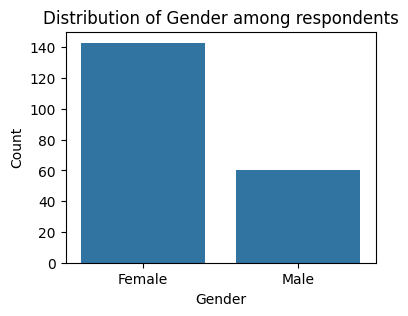

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 3))
sns.countplot(data=df, x='Gender')
plt.title('Distribution of Gender among respondents')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


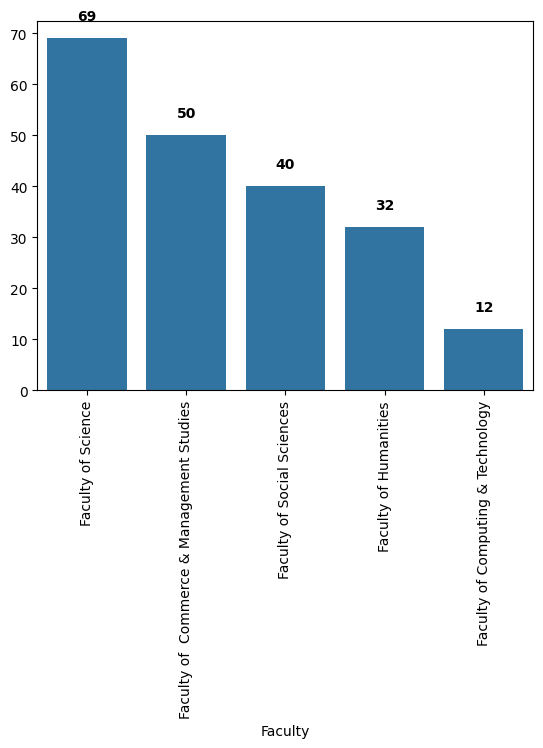

In [11]:
# create a bar plot for faculty counts
faculty_counts = df['Faculty'].value_counts()
sns.barplot(x=faculty_counts.index, y=faculty_counts.values)

# add numbers to the bars
for i, v in enumerate(faculty_counts.values):
    plt.text(i, v+3, str(v), color='black', fontweight='bold', ha='center', va='bottom')
# rotate x-axis labels by 45 degrees
plt.xticks(rotation=90)
# show the plot
plt.show()

In [12]:
# Check the distribution of categorical variables
print(df['Gender'].value_counts())
print(df['Faculty'].value_counts())

Gender
Female    143
Male       60
Name: count, dtype: int64
Faculty
Faculty of Science                           69
Faculty of  Commerce & Management Studies    50
Faculty of Social Sciences                   40
Faculty of Humanities                        32
Faculty of Computing & Technology            12
Name: count, dtype: int64


In [13]:
# Use .info() to display a summary of the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 78 columns):
 #   Column                                                                                                                                                                  Non-Null Count  Dtype 
---  ------                                                                                                                                                                  --------------  ----- 
 0   Record ID                                                                                                                                                               203 non-null    int64 
 1   Survey Timestamp                                                                                                                                                        203 non-null    object
 2   Student Number                                                                                            

In [14]:
# Drop the specified columns from the DataFrame
columns_to_drop = ['Record ID', 'Survey Timestamp', 'Student Number', 'Complete?']
df.drop(columns=columns_to_drop, inplace=True)

### 2.1 Check for missing values

In [15]:
# count of missing values in each column of the DataFrame
df.isna().sum()

Gender                                                                                                0
What is your ethnicity                                                                                0
GCE (A/L) Examination District                                                                        2
Do you have a LinkedIn profile                                                                        3
Is at least one of your parents a graduate?                                                           0
                                                                                                     ..
I had a good idea about my strengths, weaknesses, threats, and opportunities                         27
I got guidance towards setting up a career goal and working to attain it through my study program    26
I took self-initiatives to drive my actions towards attaining my career goal                         27
My activities/decisions/choices as an undergraduate were not inf

In [16]:
# Check for duplicate rows
duplicated_rows = df[df.duplicated()]

# Print the duplicated rows
print(duplicated_rows)


Empty DataFrame
Columns: [Gender, What is your ethnicity, GCE (A/L) Examination District , Do you have a LinkedIn profile, Is at least one of your parents a graduate?, Faculty, Degree Type, Degree Program, Academic Department, Medium of Instruction  , Class Received, Internship as a part of your degree program, Currently employed, Sector Employed, Current status of your employment?, How did you find this job  , I found the job I wanted, My job is not related to what I studied, I am happy about my current job, My job does not require a degree-equivalent qualification, Handling Microsoft Office package, Using Email / Internet, Handling databases, Using Google or Microsoft services/tools for productivity, Using AI-based services/tools, Using data analysis software (Ex. MS Power BI)), Ability to converse in English, Ability to write in English, Ability to communicate with someone professionally, Ability to make an effective presentation, Ability to negotiate and come to a consensus, Abilit

### Review rows with missing values

In [17]:
# Find the most common value in the 'Degree Type' column
common_degree_type = df['Degree Type'].mode()[0]

# Impute missing values in the 'Degree Type' column with the most common value
df['Degree Type'] = df['Degree Type'].fillna(common_degree_type)

# Find the most common value in the 'Do you have a LinkedIn profile' column
common_linkedin_profile = df['Do you have a LinkedIn profile'].mode()[0]

# Impute missing values in the 'Do you have a LinkedIn profile' column with the most common value
df['Do you have a LinkedIn profile'] = df['Do you have a LinkedIn profile'].fillna(common_linkedin_profile)

# Find the most common value in the 'GCE (A/L) Examination District' column
common_exam_district = df['GCE (A/L) Examination District '].mode()[0]

# Impute missing values in the 'GCE (A/L) Examination District' column with the most common value
df['GCE (A/L) Examination District '] = df['GCE (A/L) Examination District '].fillna(common_exam_district)


In [18]:
# Define columns associated with employment status
employment_columns = ['Sector Employed', 'Current status of your employment?', 'How did you find this job  ', 'I found the job I wanted', 'My job is not related to what I studied', 'I am happy about my current job', 'My job does not require a degree-equivalent qualification']

# For employed individuals, impute missing values in employment-related columns with the most common value
employed_df = df[df['Currently employed'] == 'Yes']
for col in employment_columns:
    employed_most_common = employed_df[col].mode()[0]
    df.loc[df['Currently employed'] == 'Yes', col] = df.loc[df['Currently employed'] == 'Yes', col].fillna(employed_most_common)

# For unemployed or non-employed individuals, leave missing values as they are or use a placeholder value
unemployed_mask = (df['Currently employed'] != 'Yes')
for col in employment_columns:
    # Use a placeholder value to indicate the absence of employment and the irrelevant of the Question
    df.loc[unemployed_mask, col] = 'Irrelevant'



In [19]:
# Define columns for each category
computer_literacy_columns = ['Handling Microsoft Office package', 'Using Email / Internet', 'Handling databases',
                             'Using Google or Microsoft services/tools for productivity', 'Using AI-based services/tools',
                             'Using data analysis software (Ex. MS Power BI))']

communication_skills_columns = ['Ability to converse in English', 'Ability to write in English',
                                'Ability to communicate with someone professionally', 'Ability to make an effective presentation',
                                'Ability to negotiate and come to a consensus', 'Ability to take leadership, when needed',
                                'Ability to work in a team towards a common goal', 'Ability to think critically and come up with an innovative solution to a problem']

attitude_columns = ["When searching for a job, I was not concerned whether it was a private sector job or a public sector job",
                    "It is not a problem for me, as a professional, to work after regular working hours (ex. after 4.00pm) when required",
                    "I don't see it as a problem when it is needed to work during some weekends as a part of the job)",
                    "I am ready to work even far away from home if the job opportunity is attractive",
                    "I prefer to work in an environment where the members belong to diverse cultures and ethnicities",
                    "It is more fun to work as a team than alone",
                    "I always prefer a challenging job",
                    "I am concerned not only about my rights but also the duties and responsibilities as an employee"]


social_capital_columns = ['I gave priority to build connections with people (Ex. professionals in my field)', 'I did a lot of sports',
                          'I did a lot of extracurricular activities', 'I knew many professionals from the industry)',
                          'I had a good rapport with my seniors and alumni', 'I maintained a positive relationship with my lecturers, supervisors, and instructors',
                          'I had a lot of connections on social media', 'I could expand my social network through my internship']
cultural_capital_columns = ["I could develop a good understanding on the typical culture of my prospective workplaces",
                            "I could secure an internship that exposed me well to a prospective workplace",
                            "I had a mentor/mentors who guided me well to be prepared to work in a dynamic work environment",
                            "I learned about ethics and workplace best practices as a part of my degree",
                            "I used different sources of information (Ex. Internet, magazines, seminars, etc.) to develop my understanding on the culture of prospective workplaces",
                            "I got involved with activities done through student societies that expose students to corporate culture"]
identity_capital_columns = ["I was known for who I am during my university years among colleagues and staff",
                            "I chose my academic and extracurricular activities carefully to develop my personal brand",
                            "I proactively worked to develop my personal brand on social media",
                            "I paid special attention on the content and presentation of my CV as an undergraduate",
                            "I was known as an undergraduate for some specialized skills (Ex: as an announcer/presenter/singer)"]
psychological_capital_columns = ["Through my study program, I got used to tight deadlines and developed my ability to work under pressure",
                                 "As an undergraduate, I could develop my skill to deal with unexpected challenges in life better",
                                 "My internship gave me a good exposure on how to handle unexpected challenges in a workplace",
                                 "I got the opportunity to learn how to handle unexpected challenges when dealing with the industry, professionals and academics through projects and student activities",
                                 "By the time I graduate, I was able to face unexpected challenges in life very well",
                                 "I never felt depressed as an undergraduate"]
agentic_capital_columns = ["I had a clear vision for my future career",
                           "I had set my career goal and worked towards that",
                           "I had a good idea about my strengths, weaknesses, threats, and opportunities",
                           "I got guidance towards setting up a career goal and working to attain it through my study program",
                           "I took self-initiatives to drive my actions towards attaining my career goal",
                           "My activities/decisions/choices as an undergraduate were not influenced by anyone",
                           "I was very confident that I'd be able to secure employment immediately after graduation"]


In [20]:
# Impute missing values with the most common value for each category
for category_columns in [computer_literacy_columns, communication_skills_columns, attitude_columns,
                         social_capital_columns, cultural_capital_columns, identity_capital_columns,
                         psychological_capital_columns, agentic_capital_columns]:
    for col in category_columns:
        most_common_value = df[col].mode()[0]
        df.fillna(most_common_value, inplace=True)

In [21]:
# Find the most common value in the 'Degree Type' column
common_degree_type = df['Degree Type'].mode()[0]

# Impute missing values in the 'Degree Type' column with the most common value
df['Degree Type'] = df['Degree Type'].fillna(common_degree_type)

# Find the most common value in the 'Do you have a LinkedIn profile' column
common_linkedin_profile = df['Do you have a LinkedIn profile'].mode()[0]

# Impute missing values in the 'Do you have a LinkedIn profile' column with the most common value
df['Do you have a LinkedIn profile'] = df['Do you have a LinkedIn profile'].fillna(common_linkedin_profile)


In [22]:
# count of missing values in each column of the DataFrame
df.isna().sum()

Gender                                                                                               0
What is your ethnicity                                                                               0
GCE (A/L) Examination District                                                                       0
Do you have a LinkedIn profile                                                                       0
Is at least one of your parents a graduate?                                                          0
                                                                                                    ..
I had a good idea about my strengths, weaknesses, threats, and opportunities                         0
I got guidance towards setting up a career goal and working to attain it through my study program    0
I took self-initiatives to drive my actions towards attaining my career goal                         0
My activities/decisions/choices as an undergraduate were not influenced b

## Encode data

In [23]:
from sklearn.preprocessing import LabelEncoder

# Define the categories
categories = ["Very good", "Good", "Average", "Poor", "Very poor"]

# Create a label encoder object
label_encoder = LabelEncoder()

# Apply label encoding for each specified column
for column in [computer_literacy_columns, communication_skills_columns, identity_capital_columns]:
    for col in column:
        # Fit label encoder on all categories to ensure consistency
        label_encoder.fit(categories)
        # Map and transform the column values using label encoder
        df[col] = label_encoder.transform(df[col])

# Now, the specified columns in the DataFrame have been label encoded with the categories provided.


In [24]:
from sklearn.preprocessing import LabelEncoder

# Define the categories
categories = ["Strongly Agree", "Agree", "Neutral", "Disagree", "Strongly Disagree"]

# Create a label encoder object
label_encoder = LabelEncoder()

# Iterate over each specified column
for column in [attitude_columns, social_capital_columns, cultural_capital_columns,
               psychological_capital_columns, agentic_capital_columns]:
    for col in column:
        # Extract unique values from the column
        unique_values = df[col].unique()

        # Update the categories list to include unique values not already in it
        categories.extend([val for val in unique_values if val not in categories])

        # Fit label encoder on updated categories
        label_encoder.fit(categories)

        # Map and transform the column values using label encoder
        df[col] = label_encoder.transform(df[col])

# Now, the specified columns in your DataFrame have been label encoded with the updated categories list.


In [25]:
# Feature Engineering for Human Capital
df['Computer_Literacy_Score'] = df[computer_literacy_columns].sum(axis=1)
df['Communication_Skills_Score'] = df[communication_skills_columns].sum(axis=1)
df['Attitude_Score'] = df[attitude_columns].sum(axis=1)

# Feature Engineering for Social Capital
df['Social_Capital_Score'] = df[social_capital_columns].sum(axis=1)

# Feature Engineering for Cultural Capital
df['Cultural_Capital_Score'] = df[cultural_capital_columns].sum(axis=1)

# Feature Engineering for Identity Capital
df['Identity_Capital_Score'] = df[identity_capital_columns].sum(axis=1)

# Feature Engineering for Psychological Capital
df['Psychological_Capital_Score'] = df[psychological_capital_columns].sum(axis=1)

# Feature Engineering for Agentic Capital
df['Agentic_Capital_Score'] = df[agentic_capital_columns].sum(axis=1)


In [26]:
# Drop the original columns as they are no longer needed
df.drop(columns=computer_literacy_columns + communication_skills_columns + attitude_columns + social_capital_columns +
                cultural_capital_columns + identity_capital_columns + psychological_capital_columns + agentic_capital_columns,
        inplace=True)

### One Hot Encording
##### To use OneHotEncoder from scikit-learn to encode a feature for K-means clustering, you need to first ensure that the feature is categorical.

In [27]:
import pandas as pd

# Assuming df is your DataFrame
df_encoded = pd.get_dummies(df, columns=["Faculty"])

# Convert only the dummy columns to integers
df_encoded = df_encoded.astype({col: 'int' for col in df_encoded.columns if 'Faculty' in col})

# List all new columns created
new_columns = df_encoded.columns[df_encoded.columns.str.startswith('Faculty_')]

print("New columns created:")
for col in new_columns:
    print(col)

df = df_encoded

New columns created:
Faculty_Faculty of  Commerce & Management Studies
Faculty_Faculty of Computing & Technology
Faculty_Faculty of Humanities
Faculty_Faculty of Science
Faculty_Faculty of Social Sciences


### Label Encoding

In [28]:
# Create a dictionary to map the categories to 0 and 1
category_map = {
    'Gender': {'Male': 0, 'Female': 1},
    'Do you have a LinkedIn profile': {'Yes': 1, 'No': 0},
    'Is at least one of your parents a graduate?': {'Yes': 1, 'No': 0},
    'Degree Type': {'General (3 years) (සාමාන්‍ය (අවුරුදු 3))': 0, 'Special (4 years) (විශේෂ (වසර 4))': 1},
    'Internship as a part of your degree program': {'Yes': 1, 'No': 0},
    'Currently employed': {'Yes': 1, 'No': 0}
}

# Convert categorical data to numerical
for col, mapping in category_map.items():
    df[col] = df[col].map(mapping)


#### Ordinal Encoding:
##### "Class Received" has a meaningful order. So we can use ordinal encoding using OrdinalEncoder from scikit-learn.

In [29]:
# List unique values of 'Class Received'
unique_values = df['Class Received'].unique()

# Print the unique values
print(unique_values)


['Second Class Honours- Upper Division' 'First Class Honours'
 'Ordinary Pass' 'Second Class Honours- Lower Division']


In [30]:
from sklearn.preprocessing import OrdinalEncoder

# Define the order of classes
class_order = ['Ordinary Pass', 'Second Class Honours- Lower Division', 'Second Class Honours- Upper Division', 'First Class Honours']

# Initialize ordinal encoder
encoder = OrdinalEncoder(categories=[class_order])

# Fit and transform the 'Class Received' column
df['Class_Received_Encoded'] = encoder.fit_transform(df[['Class Received']])


In [31]:
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Select numerical columns for clustering
numerical_cols = ['Faculty_Faculty of  Commerce & Management Studies',
                  'Faculty_Faculty of Computing & Technology',
                  'Faculty_Faculty of Humanities',
                  'Faculty_Faculty of Science',
                  'Faculty_Faculty of Social Sciences',
                  'Do you have a LinkedIn profile',
                  'Internship as a part of your degree program',
                  'Computer_Literacy_Score',
                  'Communication_Skills_Score',
                  'Attitude_Score',
                  'Social_Capital_Score', 'Cultural_Capital_Score', 'Identity_Capital_Score', 'Psychological_Capital_Score', 'Agentic_Capital_Score']

# Select the numerical columns for clustering
X = df[numerical_cols]

Scale the features in `X` using `StandardScaler`, and assign the scaled data to a new variable `X_scaled`.

In [32]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## **Step 3: Data modeling**

In [33]:
from sklearn.cluster import KMeans

def kmeans_inertia(num_clusters, x_vals):
    """
    Accepts as arguments list of ints and data array.
    Fits a KMeans model where k = each value in the list of ints.
    Calculates inertia for each k value.
    Returns each k-value's inertia appended to a list.
    """
    inertia_values = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42, n_init=10)  # Explicitly setting n_init
        kms.fit(x_vals)
        inertia_values.append(kms.inertia_)

    return inertia_values

# Assuming num_clusters is a list of k-values want to evaluate
num_clusters = list(range(2, 15))  # k values from 2 to 10
inertia = kmeans_inertia(num_clusters, X_scaled)
print(inertia)


[2522.2646369643803, 2241.5905924396593, 2005.7764537593719, 1764.251941886547, 1547.2696639850528, 1452.6956569499735, 1345.770099733917, 1287.8521514645684, 1210.4723551755815, 1167.77408855163, 1105.911421446528, 1053.4349696947386, 1031.8927082659493]


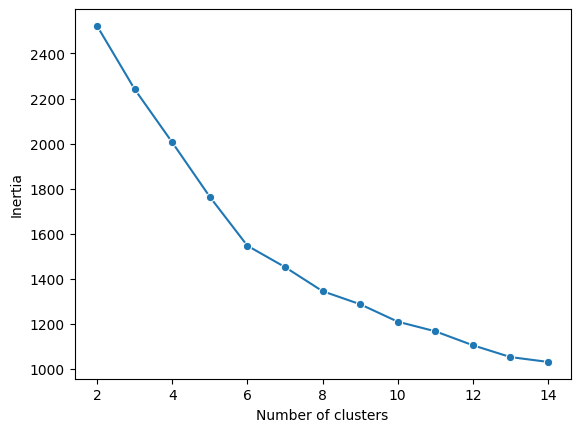

In [34]:
# Create a line plot.

### YOUR CODE HERE ###

plot = sns.lineplot(x=num_clusters, y=inertia, marker = 'o')
plot.set_xlabel("Number of clusters");
plot.set_ylabel("Inertia");

* Evaluate the silhouette score using the `silhouette_score()` function.
* Silhouette scores are used to study the distance between clusters.

Then, compare the silhouette score of each value of k, from 2 through 15. To do this, write a function called `kmeans_sil` that takes in `num_clusters` and `x_vals` (`X_scaled`) and returns a list of each k-value's silhouette score.

In [35]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def kmeans_sil(num_clusters, x_vals):
    """
    Accepts as arguments list of ints and data array.
    Fits a KMeans model where k = each value in the list of ints.
    Calculates a silhouette score for each k value.
    Returns each k-value's silhouette score appended to a list.
    """
    sil_score = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42, n_init=10)  # Explicitly setting n_init
        kms.fit(x_vals)
        sil_score.append(silhouette_score(x_vals, kms.labels_))

    return sil_score


sil_score = kmeans_sil(num_clusters, X_scaled)
print(sil_score)

[0.1840079472254679, 0.14421290280277546, 0.19267879309450148, 0.2263674952342376, 0.26284527795304286, 0.22589417610704732, 0.23092229495569733, 0.21172901656954776, 0.23551000885240347, 0.21495705992726524, 0.2229885237954119, 0.21454657613543898, 0.19476942818951776]


line plot that shows the relationship between `num_clusters` and `sil_score`.

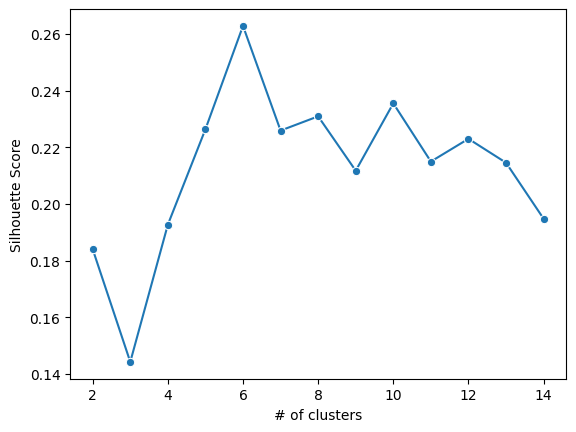

In [36]:
# Create a line plot.

plot = sns.lineplot(x=num_clusters, y=sil_score, marker = 'o')
plot.set_xlabel("# of clusters");
plot.set_ylabel("Silhouette Score");


### Silhouette scores near 1 indicate that samples are far away from neighboring clusters.
### Scores close to 0 indicate that samples are on or very close to the decision boundary between two neighboring clusters.

### The plot indicates that the silhouette score is closest to 1 when the data is partitioned into six clusters.

* PCA can help you visualize high-dimensional data in a lower-dimensional space, making it easier to understand and interpret clusters.
\By reducing the data to 2D or 3D,we can see how well clusters are separated.


In [37]:
# Reduce dimensionality using PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

In [38]:
# Perform k-means clustering
# kmeans = KMeans(n_clusters=6, random_state=58)
kmeans = KMeans(n_clusters=6, random_state=58, n_init=10)
kmeans.fit(X_pca)

KMeans(n_clusters=6, n_init=10, random_state=58)

In [39]:
# Add cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_

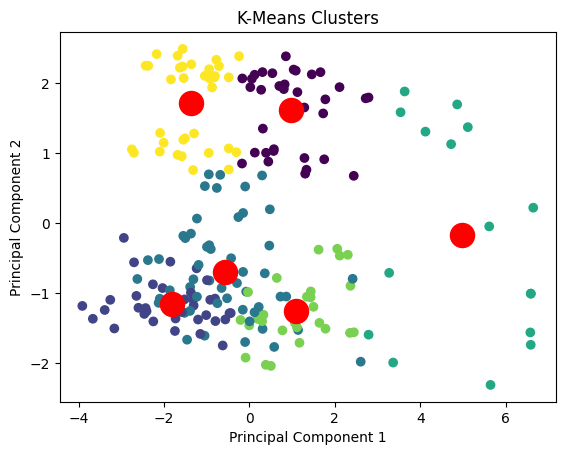

In [46]:
# Get the cluster labels
labels = kmeans.labels_

# Create a scatter plot of the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')

# Plot the cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')

# Add a title and labels
plt.title('K-Means Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Show the plot
plt.show()

In [45]:
# Create a color map for clusters
color_map = { 0: 'rgb(255,0,0)', 1: 'rgb(0,255,0)', 2: 'rgb(0,0,255)', 3: 'rgb(255, 212, 085)', 4: 'rgb(255,0,255)', 5: 'rgb(0,255,255)', 6: 'rgb(128,0,128)' }

# Assign colors to clusters
df['Color'] = df['Cluster'].map(color_map)

# Create 3D scatter plot
fig = go.Figure()

# Add data points for all clusters
fig.add_trace(go.Scatter3d(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    z=X_pca[:, 2],
    mode='markers',
    marker=dict(
        size=4,
        color=df['Color'],
        opacity=0.7
    ),
    name='Data Points'
))

# Add centroids
centroids = kmeans.cluster_centers_
fig.add_trace(go.Scatter3d(
    x=centroids[:, 0],
    y=centroids[:, 1],
    z=centroids[:, 2],
    mode='markers',
    marker=dict(
        size=6,
        color='black',
        opacity=1,
        line=dict(
            color='red',
            width=2
        )
    ),
    name='Centroids'
))

# Update layout to change diagram size
fig.update_layout(
    scene=dict(
        xaxis_title='Principal Component 1',
        yaxis_title='Principal Component 2',
        zaxis_title='Principal Component 3'
    ),
    title='K-Means Clustering with PCA (3D)',
    width=1200,  # Set width to 800 pixels
    height=600  # Set height to 600 pixels
)

fig.show()

In [47]:
# Calculate the total number of employed individuals in the dataset
total_employed = df['Currently employed'].sum()

# Calculate the total number of individuals in the dataset
total_individuals = len(df)

# Calculate the proportion of employed individuals in the dataset
overall_employment_percentage = (total_employed / total_individuals) * 100  # Convert to percentage

print(f"Overall Employment Percentage: {overall_employment_percentage:.2f}%")
# Calculate the number of employed individuals in each cluster
employed_counts = df.groupby('Cluster')['Currently employed'].sum()

# Calculate the total number of individuals in each cluster
total_counts = df.groupby('Cluster')['Currently employed'].count()

# Calculate the proportion of employed individuals in each cluster
proportion_employed = (employed_counts / total_counts) * 100  # Convert to percentage

# Print the employment percentage for each cluster
for cluster, percentage in proportion_employed.items():
    print(f"Cluster {cluster}: {percentage:.2f}% employed")


Overall Employment Percentage: 71.43%
Cluster 0: 67.65% employed
Cluster 1: 88.89% employed
Cluster 2: 57.69% employed
Cluster 3: 62.50% employed
Cluster 4: 86.21% employed
Cluster 5: 69.44% employed


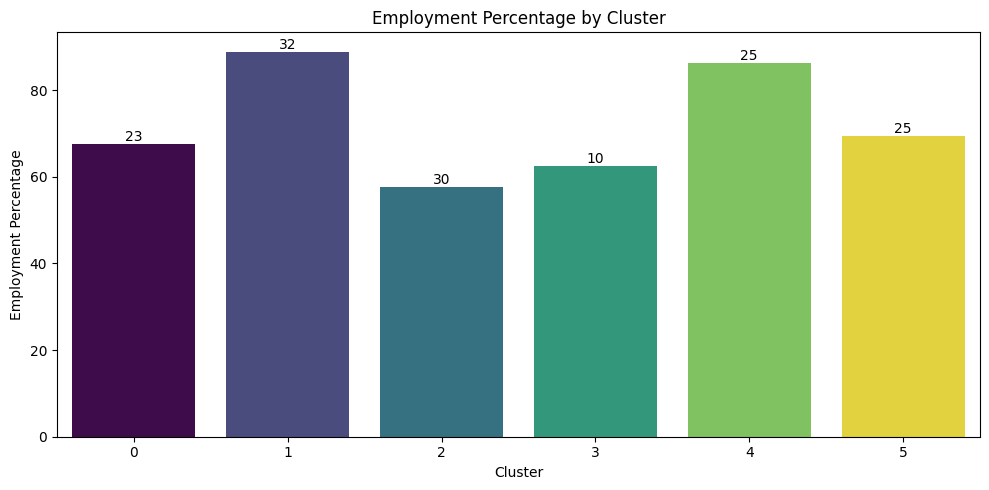

In [52]:
# Calculate employment percentages
employed_counts = df.groupby('Cluster')['Currently employed'].sum()
total_counts = df.groupby('Cluster')['Currently employed'].count()
proportion_employed = (employed_counts / total_counts) * 100

# Create DataFrame for employment visualization
cluster_data = pd.DataFrame({
    'Cluster': proportion_employed.index,
    'Employment Percentage': proportion_employed.values
})

# Plot employment percentage by cluster
plt.figure(figsize=(10, 5))
sns.barplot(x='Cluster', y='Employment Percentage', data=cluster_data, hue='Cluster', palette='viridis', legend=False)
plt.title('Employment Percentage by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Employment Percentage')

# Add text annotations for number of data points
for index, value in enumerate(proportion_employed):
    plt.text(index, value, f'{employed_counts.iloc[index]}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [59]:
import pandas as pd

# Calculate mean scores for each cluster
mean_scores = df.groupby('Cluster')[numerical_cols].mean().reset_index()

# Calculate employment percentage for each cluster
employed_counts = df.groupby('Cluster')['Currently employed'].sum()
total_counts = df.groupby('Cluster')['Currently employed'].count()
employment_percentage = (employed_counts / total_counts) * 100

# Merge mean scores and employment percentage into one DataFrame
cluster_profile = pd.merge(mean_scores, employment_percentage.rename('Employment Percentage'),
                           left_on='Cluster', right_index=True)

# Set 'Cluster' column as index for better readability
cluster_profile.set_index('Cluster', inplace=True)

# Create a new DataFrame with desired structure
new_df = cluster_profile.copy()

new_df.head()


,Faculty_Faculty of Commerce & Management Studies,Faculty_Faculty of Computing & Technology,Faculty_Faculty of Humanities,Faculty_Faculty of Science,Faculty_Faculty of Social Sciences,Do you have a LinkedIn profile,Internship as a part of your degree program,Computer_Literacy_Score,Communication_Skills_Score,Attitude_Score,Social_Capital_Score,Cultural_Capital_Score,Identity_Capital_Score,Psychological_Capital_Score,Agentic_Capital_Score,Employment Percentage
Cluster,,,,,,,,,,,,,,,,
0,0.000000,0.000000,0.117647,0.882353,0.000000,0.852941,0.205882,13.382353,15.941176,16.088235,15.617647,11.264706,10.147059,12.794118,10.911765,67.647059
1,0.833333,0.166667,0.000000,0.000000,0.000000,0.916667,0.972222,9.166667,8.888889,8.638889,8.666667,4.055556,4.638889,6.055556,6.277778,88.888889
2,0.057692,0.000000,0.288462,0.038462,0.615385,0.461538,0.750000,9.596154,11.096154,10.000000,9.480769,8.346154,7.326923,11.153846,10.846154,57.692308
3,0.062500,0.062500,0.187500,0.437500,0.250000,0.812500,0.500000,14.000000,18.187500,28.812500,31.500000,27.125000,15.125000,27.875000,32.750000,62.500000
4,0.551724,0.172414,0.137931,0.000000,0.137931,1.000000,1.000000,13.517241,17.206897,17.931034,14.827586,12.034483,9.275862,15.551724,17.379310,86.206897


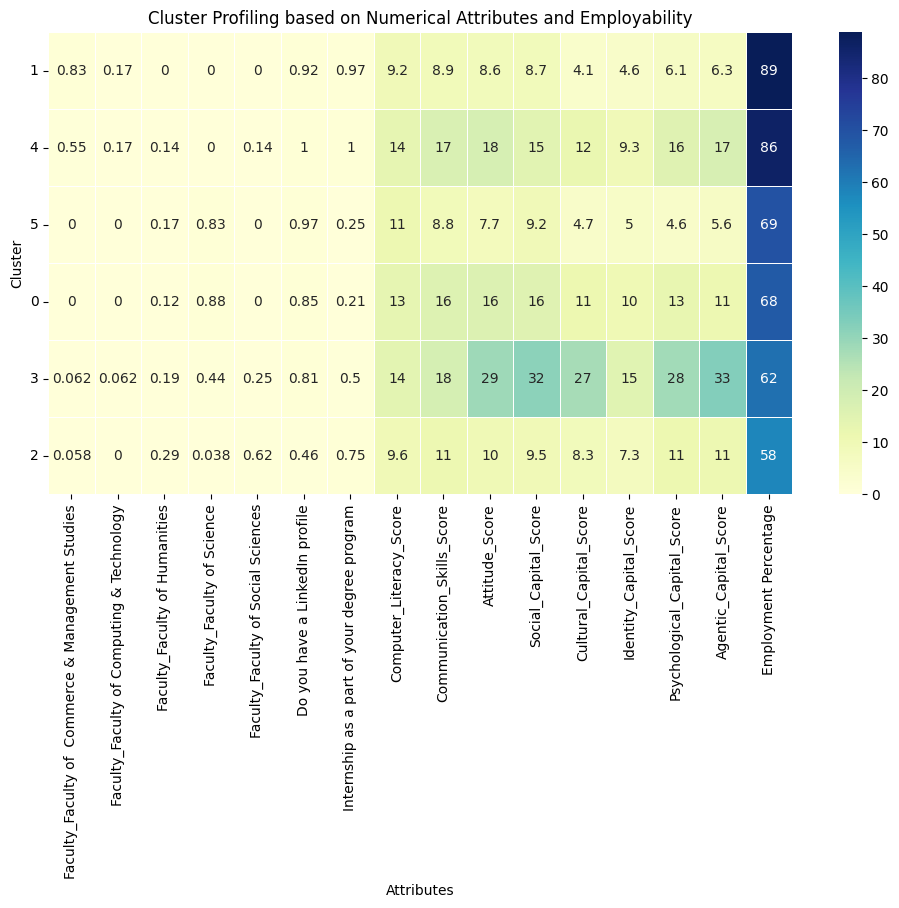

In [64]:
# Sort clusters by employability
cluster_profile_sorted = new_df.sort_values(by='Employment Percentage', ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_profile_sorted, annot=True, cmap='YlGnBu', cbar=True, linewidths=.5)
plt.title('Cluster Profiling based on Numerical Attributes and Employability')
plt.xlabel('Attributes')
plt.ylabel('Cluster')
plt.yticks(rotation=0)  # Keep cluster labels horizontal
plt.show()

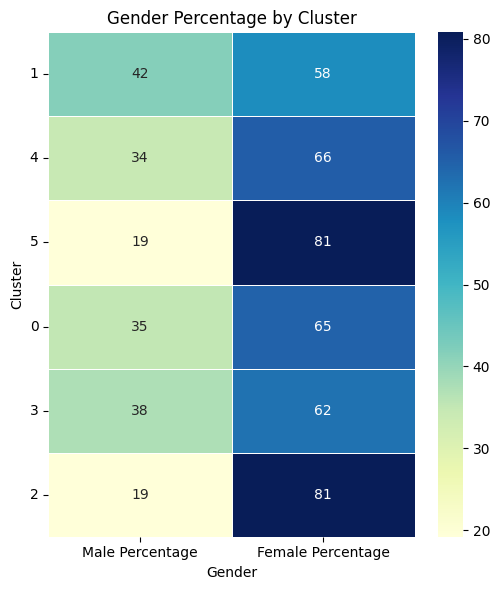

In [68]:

# Calculate gender percentage for each cluster
gender_counts = df.groupby('Cluster')['Gender'].value_counts().unstack(fill_value=0)
gender_percentage = gender_counts.div(gender_counts.sum(axis=1), axis=0) * 100

# Rename columns for better readability
gender_percentage.rename({0: 'Male Percentage', 1: 'Female Percentage'}, axis=1, inplace=True)

# Merge gender_percentage with new_df
cluster_profile_with_gender = pd.merge(new_df, gender_percentage, left_index=True, right_index=True)

# Sort clusters by employability
cluster_profile_sorted = cluster_profile_with_gender.sort_values(by='Employment Percentage', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))

# Heatmap for gender percentage
plt.subplot(1, 2, 2)
sns.heatmap(cluster_profile_sorted[['Male Percentage', 'Female Percentage']],
            annot=True, cmap='YlGnBu', cbar=True, linewidths=.5)
plt.title('Gender Percentage by Cluster')
plt.xlabel('Gender')
plt.ylabel('Cluster')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()


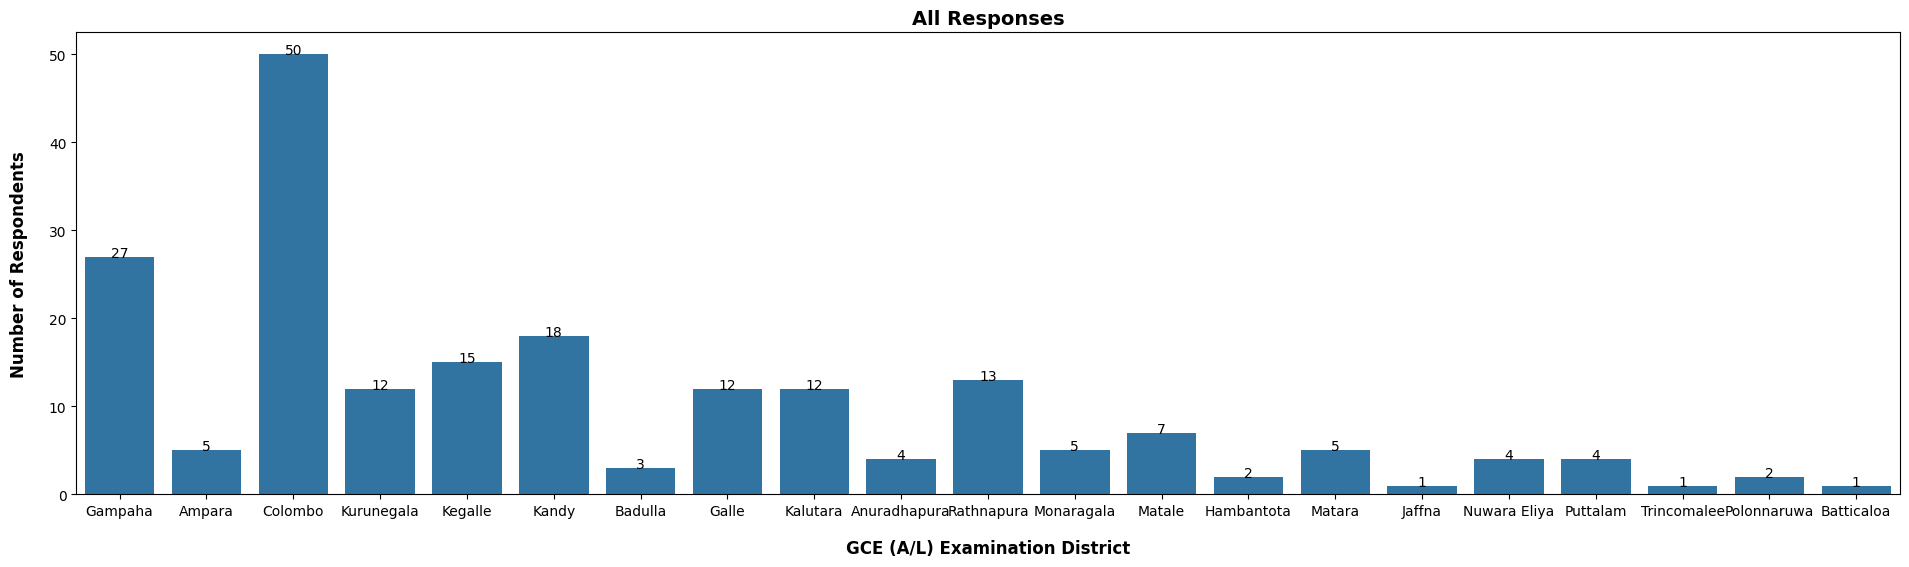

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(80, 6))

# Chart 1: Responses for 'GCE (A/L) Examination District' without considering employment
plt.subplot(1, 3, 1)
sns.countplot(data=df, x='GCE (A/L) Examination District ')
plt.title('All Responses', fontsize=14, fontweight='bold')
plt.xlabel('GCE (A/L) Examination District', fontsize=12, fontweight='bold', labelpad=15)
plt.ylabel('Number of Respondents', fontsize=12, fontweight='bold', labelpad=15)
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

# Show the plots
plt.show()


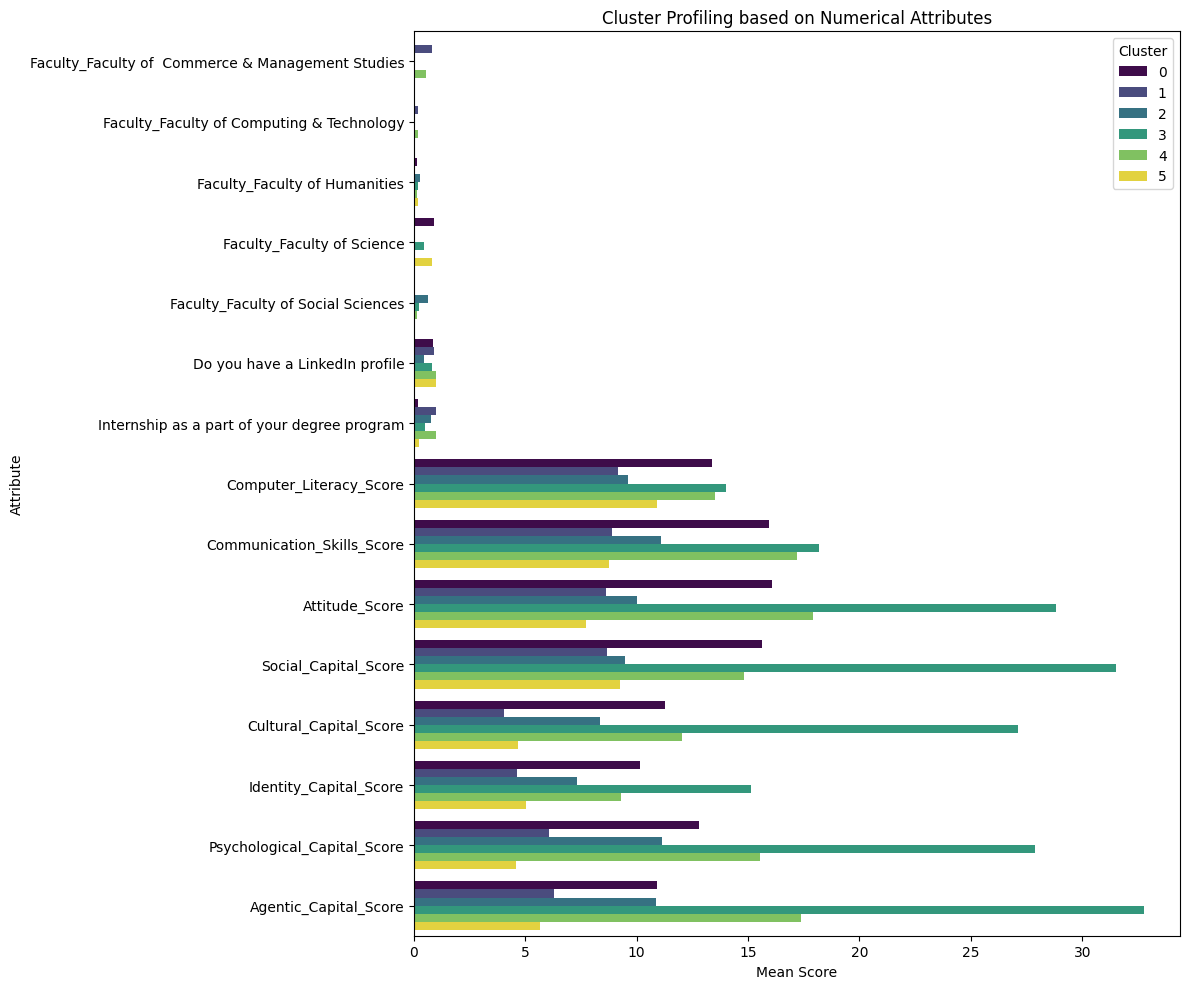

In [55]:
# Calculate mean scores for each cluster
mean_scores = df.groupby('Cluster')[numerical_cols].mean().reset_index()

# Melt DataFrame to long format for plotting
mean_scores_melted = pd.melt(mean_scores, id_vars='Cluster',
                              value_vars=numerical_cols,
                              var_name='Attribute', value_name='Mean_Score')

# Plotting
plt.figure(figsize=(12, 10))
sns.barplot(x='Mean_Score', y='Attribute', hue='Cluster',
            data=mean_scores_melted, palette='viridis', orient='h')

plt.title('Cluster Profiling based on Numerical Attributes')
plt.xlabel('Mean Score')
plt.ylabel('Attribute')
plt.legend(title='Cluster', loc='upper right')
plt.tight_layout()
plt.show()

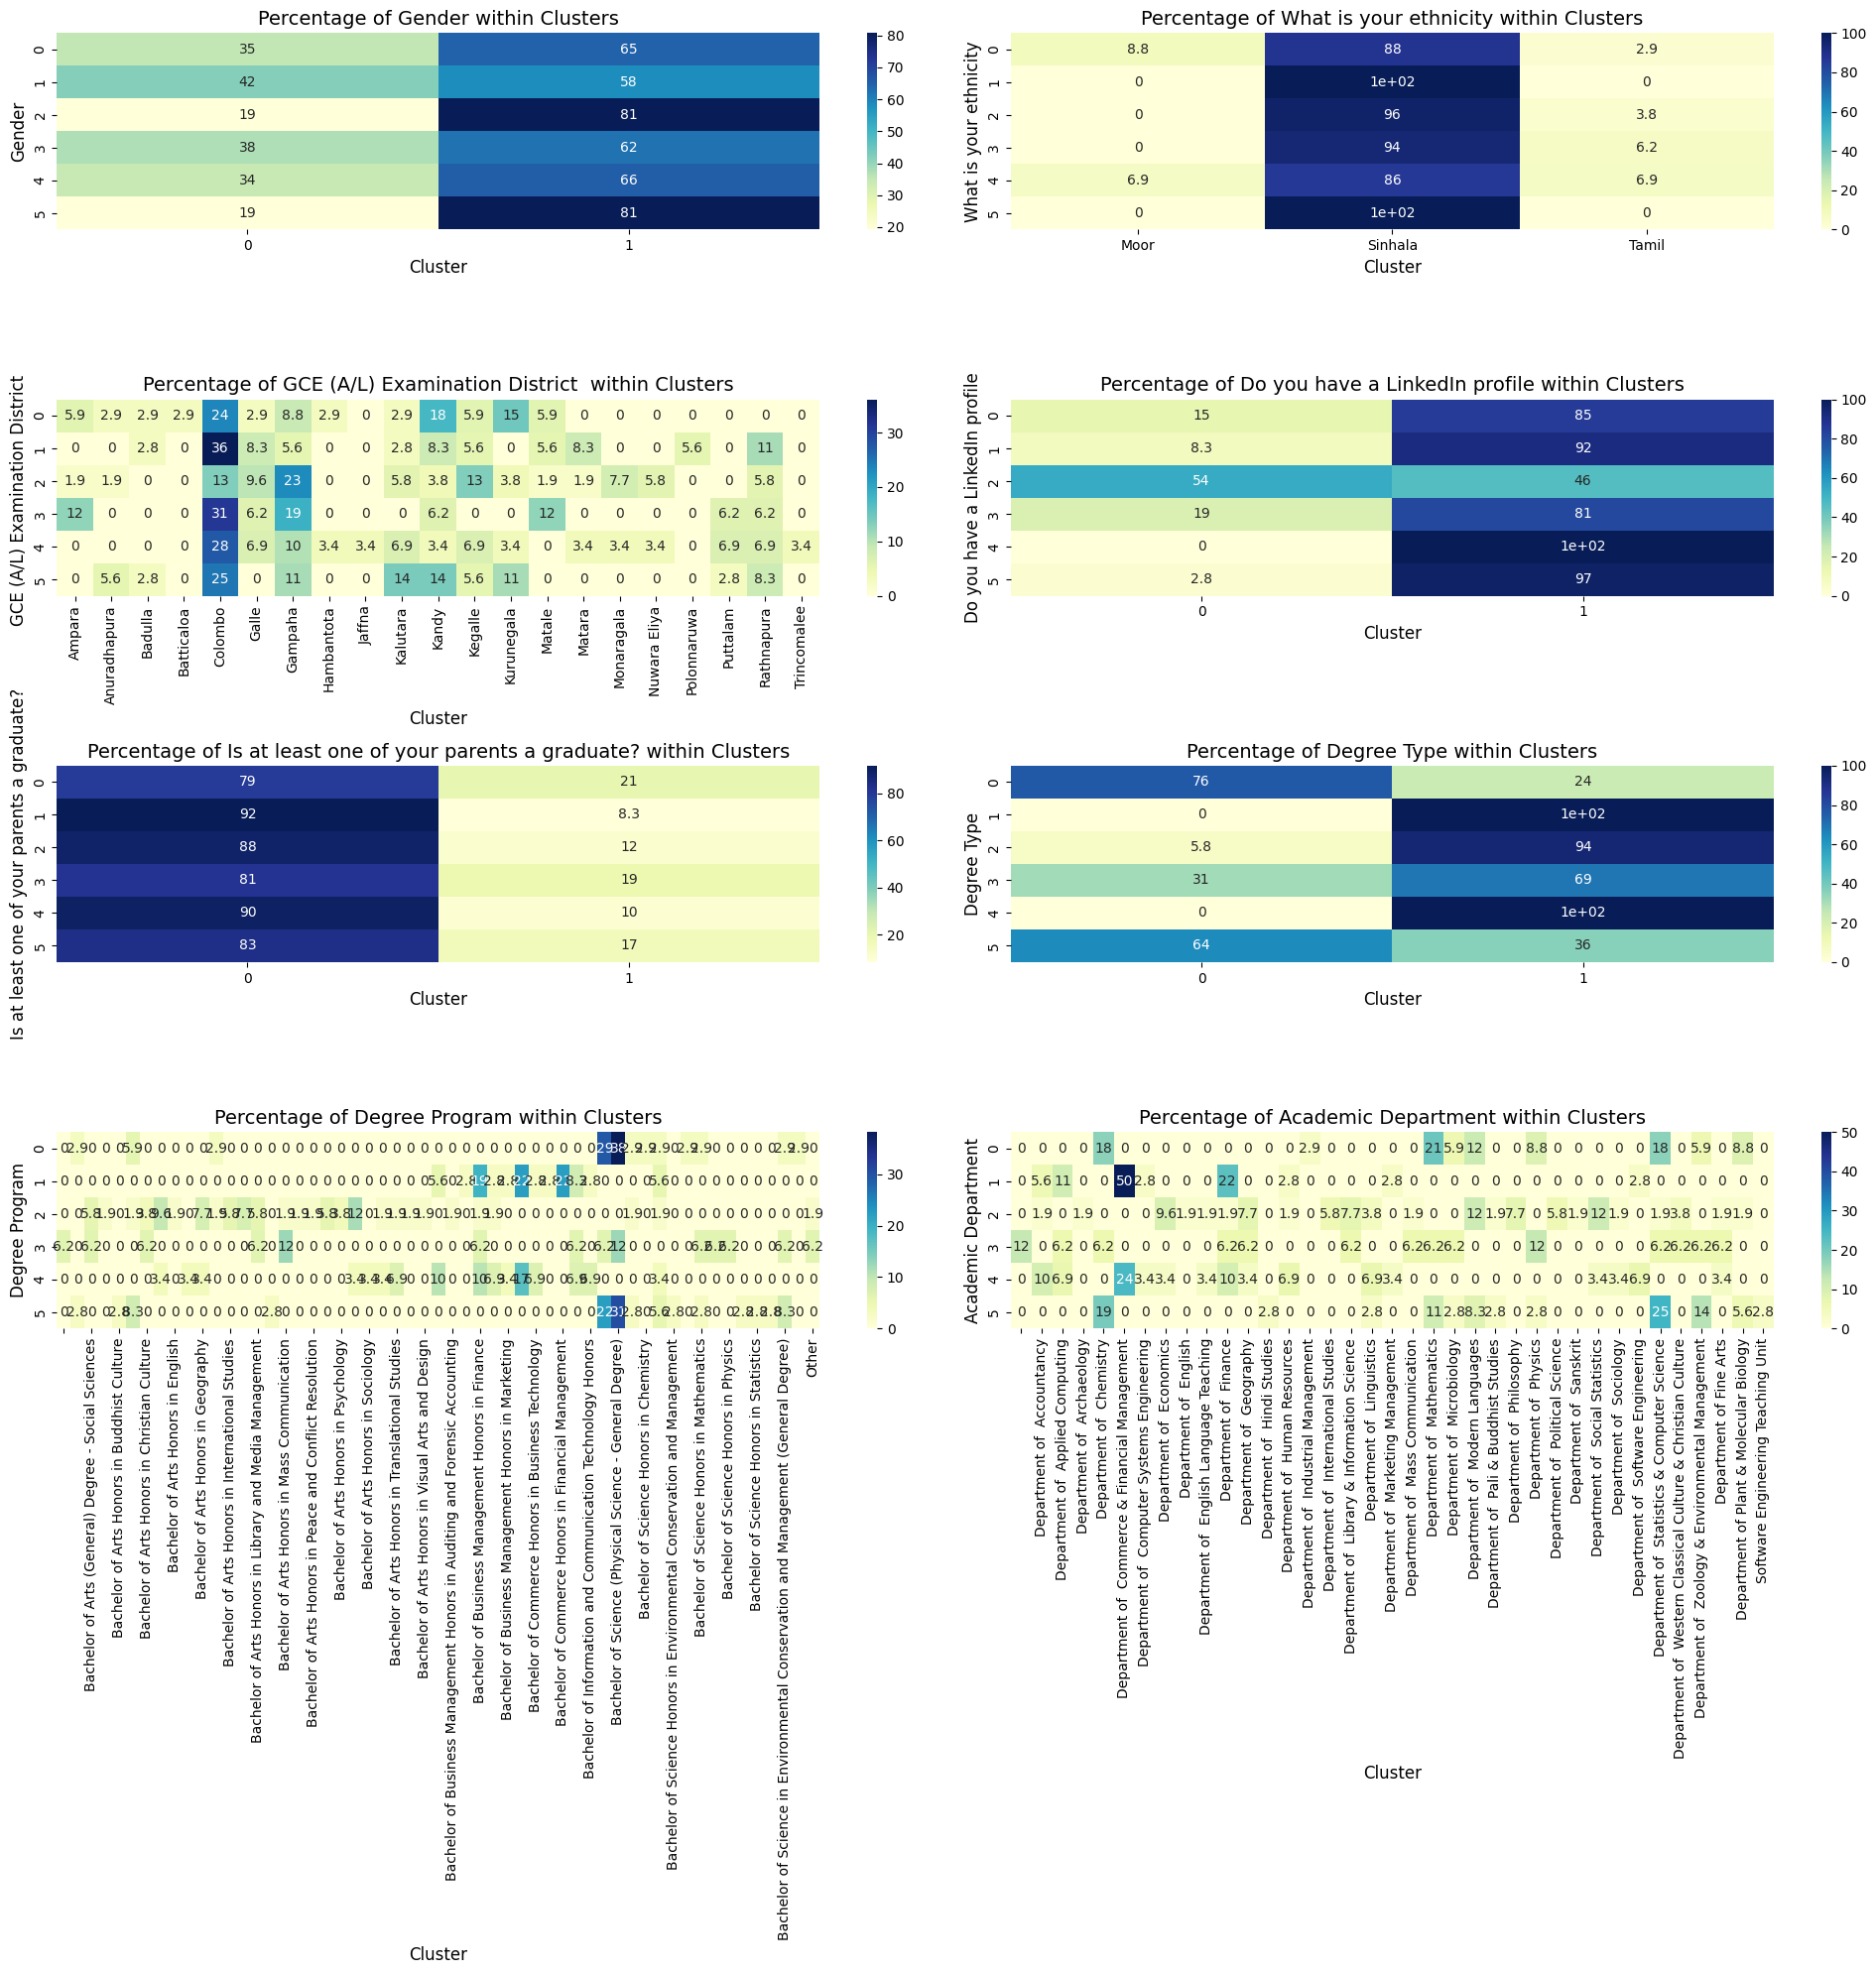

In [49]:
# Function to calculate percentage of categories within each cluster
def get_category_percentages(variable):
    category_percentages = df.groupby(['Cluster', variable])[variable].count().reset_index(name='Count')
    category_percentages = category_percentages.set_index(['Cluster', variable])['Count'].unstack().fillna(0)
    category_percentages = category_percentages.div(category_percentages.sum(axis=1), axis=0) * 100
    return category_percentages

# Categorical variables to profile
categorical_vars = ['Gender', 'What is your ethnicity', 'GCE (A/L) Examination District ',
                    'Do you have a LinkedIn profile', 'Is at least one of your parents a graduate?',
                    'Degree Type', 'Degree Program', 'Academic Department']

# 'Medium of Instruction ','Class Received',, 'Currently employed',
# 'Sector Employed', 'Current status of your employment?', 'How did you find this job',
# 'I found the job I wanted', 'My job is not related to what I studied',
# 'I am happy about my current job', 'My job does not require a degree-equivalent qualification'] , 'Internship as a part of your degree program'

# Create a grid of subplots to visualize category percentages
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))
axs = axs.flatten()

for idx, var in enumerate(categorical_vars):
    category_percentages = get_category_percentages(var)
    sns.heatmap(category_percentages, annot=True, cmap='YlGnBu', ax=axs[idx])
    axs[idx].set_title(f'Percentage of {var} within Clusters', fontsize=14)
    axs[idx].set_xlabel('Cluster', fontsize=12)
    axs[idx].set_ylabel(var, fontsize=12)

plt.tight_layout()
plt.show()

## **Considerations**

**What summary would you provide to stakeholders?**
*  The K-means clustering enabled this data to be effectively grouped. It helped identify patterns that can

In [41]:
### References
